# Disease diagnosis assistant

This noteboook will cover a disease diagnosis classifcation algorithm for diagnosis assistance. The algorithm is based off of a data set that is more than a decade old and is therefore more of a proof of concept. The recommendation afterwards is for hospitals to pull together and create a proper open source dataset with disease sympotms so that various aplications can be applied, one of which is a online tool to help individuals with self diagnosis. Especially during a time when testing is short, the output of number of cases with COIVD-19 as a possible diagnosis could be collected, along with the users location, to give an approximation on possible cases. This could help in mitigating disease and also help provide proper resources to those who need it.

The dataset used is from columbia http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html and was collected based on patient discharge summaries at New York Presbyterian Hospital from 2004. The total amount of patient discharge included in the dataet collection was 33,724. The dataset includes the disease, the symptoms, and the number of disseases ocurring. The dataset contains a total of 133 diseases and their associated symptoms. The dataset version imported into this project does not include number of disease occurances as it is not used in the classification algorithm. The original dataset had codes for identification such as UMLS:C0008031 that were removed in excel using text-to-columns as part of a data cleaning step.

The diease was populated for each symptom for classification by filling in blank cells with the appropriate diseases. https://www.ablebits.com/office-addins-blog/2014/05/02/fill-blanks-excel/

Once that cleaned dataset was created, another dataset was made to simulate thousands of cases so machine learning can be applied. Working from the cleaned dataset (Diseases_data.csv), the disease column was then populated for each symptom in excel and an ID was generated by adding numbers consecutively starting with 1. A unique case number was then provided in the next column. The ID represented the Id and the case number represented a mock case with the symptoms and diagnoses. The initial 133 diseases and associated symptoms were then duplicated hundreds of times with symptoms randomly removed, with each duplicate disease set representing a different case. A total of 3570 mock cases were generated. A dataset (diseases.csv) was thereby created that had a mock sample of over 3500 cases where symptoms were classified with their ultimate diagnosis.  

In [25]:
import pandas as pd
import numpy as np

In [26]:
#reading in dataframe for the original dataset containing 133 diseases and their described symptoms
original_data = pd.read_csv('Diseases_data.csv') 

In [27]:
#display top rows of dataframe to confirm upload is correct
original_data.head()

,ID,Disease,Symptom
0,1,hypertensive disease,pain chest
1,1,hypertensive disease,shortness of breath
2,1,hypertensive disease,dizziness
3,1,hypertensive disease,asthenia
4,1,hypertensive disease,fall


With the data inputted properly, lets examine the dataframe.

In [28]:
data_disease= original_data.drop(columns=['ID'])
data_disease.head()

,Disease,Symptom
0,hypertensive disease,pain chest
1,hypertensive disease,shortness of breath
2,hypertensive disease,dizziness
3,hypertensive disease,asthenia
4,hypertensive disease,fall


In [29]:
data_disease.describe()

,Disease,Symptom
count,1864,1864
unique,133,396
top,upper respiratory infection,shortness of breath
freq,28,46


From the table above, it can be determined that there are a total of 133 diseases classifed in the dataset and 396 unique symptoms. There are 1864 entries in the symptom column with only 396 unique symptom values, meaning there are many common symoptoms between diseases. This is why a machine learning classification algorithm is needed in order to provide the most likely disease from a collection of symptoms.

Next, lets explore the different diseases to see which disease have the most associated symptoms.

In [30]:
original_data['Disease'].value_counts()

upper respiratory infection             28
bipolar disorder                        28
psychotic disorder                      25
anxiety state                           24
malignant neoplasms                     24
malignant neoplasm of prostate          23
suicide attempt                         23
chronic kidney failure                  22
influenza                               21
depression mental                       21
emphysema pulmonary                     21
delusion                                21
hypothyroidism                          21
anemia                                  20
confusion                               20
diverticulitis                          20
pneumonia                               19
personality disorder                    19
carcinoma                               19
myocardial infarction                   18
Pneumocystis carinii pneumonia          18
hemiparesis                             18
primary carcinoma of the liver cells    18
dementia   

It would be helpful to also know which are the most common symptoms among all diseases.

In [31]:
original_data['Symptom'].value_counts()

shortness of breath              46
pain                             41
fever                            35
pain abdominal                   27
vomiting                         24
diarrhea                         24
asthenia                         22
dyspnea                          22
cough                            22
unresponsiveness                 22
nausea                           22
chill                            21
decreased body weight            20
pain chest                       20
apyrexial                        19
agitation                        19
rale                             18
lesion                           17
mass of body structure           17
sore to touch                    16
hypotension                      16
syncope                          15
orthopnea                        14
thicken                          14
hallucinations auditory          14
night sweat                      14
suicidal                         13
haemorrhage                 

We can examine the top 10 most common symptoms to get a clearer picture.

In [32]:
data_count= original_data.Symptom.value_counts().reset_index().rename(columns={'index': 'Symptom type', 0: 'count'})
data_count.head()

,Symptom type,Symptom
0,shortness of breath,46
1,pain,41
2,fever,35
3,pain abdominal,27
4,vomiting,24


In [33]:
data_count = data_count.rename(columns = {"Symptom type": "Symptom", 
                                  "Symptom":"Count"}) 
top_10 = data_count.head(10)
top_10.head()

,Symptom,Count
0,shortness of breath,46
1,pain,41
2,fever,35
3,pain abdominal,27
4,vomiting,24


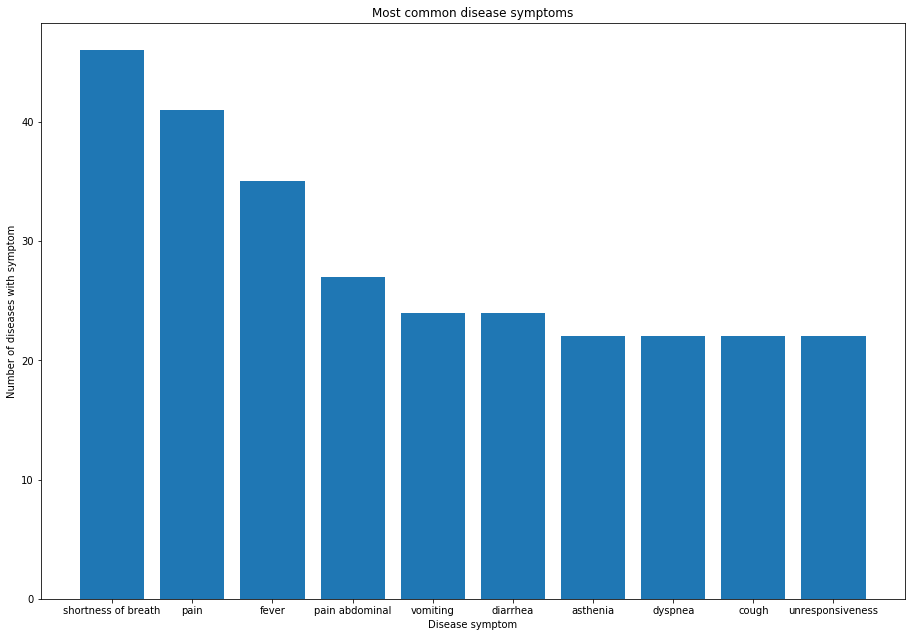

In [34]:
import matplotlib.pyplot as plt
figure = plt.figure()
axes = figure.add_axes([1,1,2,2])
X = top_10['Symptom']
Y= top_10['Count']
axes.bar(X,Y)
axes.set_ylabel('Number of diseases with symptom')
axes.set_xlabel('Disease symptom')
axes.set_title('Most common disease symptoms')
plt.show()

Thus, shortness of breath is the most common symptom, followed by pain and fever in the top 3. Described symptoms with only those 3 will be very difficualt to classify. A proper diagnosis will likely need more than 3 sypmtoms to be described.

Now that we have examined the original dataset with the 133 diseases and their full symptoms, we can do some exploration of the datset of cases that have a balanced number of cases with the 133 diseases within them.

In [35]:
#read in the case dataset into a dataframe
data = pd.read_csv('diseases.csv') 

In [36]:
data.head()

,Case,ID,Disease,Symptom
0,1,1,hypertensive disease,pain chest
1,1,1,hypertensive disease,shortness of breath
2,1,1,hypertensive disease,dizziness
3,1,1,hypertensive disease,asthenia
4,1,1,hypertensive disease,fall


In [37]:
data_explore= data.drop(columns=['ID', 'Case'])
data_explore.head()

,Disease,Symptom
0,hypertensive disease,pain chest
1,hypertensive disease,shortness of breath
2,hypertensive disease,dizziness
3,hypertensive disease,asthenia
4,hypertensive disease,fall


In [38]:
data_explore.describe()

,Disease,Symptom
count,48760,48760
unique,133,396
top,upper respiratory infection,shortness of breath
freq,714,1201


There are a total of nearly 50,000 rows in the dataset containing the orinigal 133 diseases and 396 symptoms. Next we can take a look at the cases.

In [39]:
data.describe()

,Case,ID
count,48760.000000,48760.000000
mean,1796.016735,64.496390
std,1032.016756,37.796729
min,1.000000,1.000000
25%,910.000000,31.000000
50%,1803.000000,63.000000
75%,2678.000000,98.000000
max,3591.000000,133.000000


As seen in the table above, there are 3590 cases and 133 diseases, with each ID number representing a diseases and each case number representing the simulated patient case.

In [40]:
data['Disease'].value_counts()

upper respiratory infection             714
bipolar disorder                        702
anxiety state                           648
psychotic disorder                      633
malignant neoplasms                     626
malignant neoplasm of prostate          604
suicide attempt                         586
chronic kidney failure                  572
hypothyroidism                          567
emphysema pulmonary                     566
COVID-19                                548
depression mental                       547
anemia                                  528
diverticulitis                          512
confusion                               511
pneumonia                               505
carcinoma                               497
hemiparesis                             486
personality disorder                    485
delusion                                483
Pneumocystis carinii pneumonia          479
myocardial infarction                   474
primary carcinoma of the liver c

In [41]:
data['Symptom'].value_counts()

shortness of breath              1201
pain                             1073
fever                             912
pain abdominal                    705
diarrhea                          629
vomiting                          625
asthenia                          581
unresponsiveness                  581
cough                             578
nausea                            574
dyspnea                           574
chill                             546
decreased body weight             525
pain chest                        520
apyrexial                         502
agitation                         486
rale                              471
lesion                            450
mass of body structure            449
hypotension                       419
sore to touch                     419
syncope                           398
thicken                           372
orthopnea                         367
hallucinations auditory           365
night sweat                       365
haemorrhage 

By examining the most common diseases and symptoms in the case dataset, it can be seen that the same balance is applied to the case datset as to the original set with only the 133 diseases and their symptoms. The diseases with the most symptoms and the most common symptoms over all diseases remain the same.

Next, now that we've examined the dataset, we can start to convert all data into numeric data so it can be read by a machine learning algorithm.

In [42]:
# One-hot encode the data using pandas get_dummies
data_onehot = pd.get_dummies(data.Symptom)
# Display the first 5 rows of the last 12 columns
data_onehot.iloc[:,5:].head(5)

,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,abscess bacterial,absences finding,achalasia,ache,adverse reaction,agitation,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
data_onehot.shape

(48760, 396)

In [44]:
# add neighborhood column back to dataframe
data_onehot['Case'] = data['Case'] 

# move neighborhood column to the first column
fixed_columns = [data_onehot.columns[-1]] + list(data_onehot.columns[:-1])
data_onehot = data_onehot[fixed_columns]

data_onehot.head()

,Case,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
data_onehot.head(15)

,Case,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
data_onehot.shape

(48760, 397)

In [47]:
data_grouped = data_onehot.groupby('Case').sum().reset_index()
data_grouped.head()


,Case,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [48]:
data_grouped.shape


(3570, 397)

First thing of note here is that we can see that there are 3570 unique cases in the original dataset.

Most importantly, we now have a data set where each unique case had it's associated sympotms in the corresponding rows, marked 1 if the symptom is present and 0 if not. Next, we need to add in the disease diagnosis for each case. We'll do that by joining the dataset with a dataset that has each unique case with it's corresponding diagnoses ID. 

In [49]:
#reading in dataframe
case_id = pd.read_csv('Case ID.csv') 

In [50]:
case_id.head()

,ID,Number,Disease,Symptom
0,1,1,hypertensive disease,pain chest
1,2,2,diabetes,polyuria
2,3,3,depression mental,feeling suicidal
3,4,4,coronary arteriosclerosis,pain chest
4,5,5,pneumonia,cough


In [51]:
diagnoses = pd.merge(data_grouped, case_id, left_on="Case", right_on="Number")
diagnoses.head()

,Case,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum,ID,Number,Disease,Symptom
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,hypertensive disease,pain chest
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,diabetes,polyuria
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,3,depression mental,feeling suicidal
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,4,coronary arteriosclerosis,pain chest
4,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,5,5,pneumonia,cough


In [52]:
diagnoses= diagnoses.drop(columns=['Case','Number','Disease','Symptom'])
diagnoses.head()

,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,abscess bacterial,...,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum,ID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,5


In [53]:
# move neighborhood column to the first column
fixed_columns = [diagnoses.columns[-1]] + list(diagnoses.columns[:-1])
diagnoses = diagnoses[fixed_columns]

diagnoses.head()

,ID,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [54]:
diagnoses.shape

(3570, 397)

Fantastic! We now have 3570 unique cases in the form of the symptom and the ultimate outcome. The data is now ready for machine learning.

In [55]:
#convert into arrays

# Labels are the values we want to predict
labels = np.array(diagnoses['ID'])
# Remove the labels from the features
# axis 1 refers to the columns
features= diagnoses.drop('ID', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [56]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 1)

In [57]:
print('train features:', train_features.shape)
print('train labels:', train_labels.shape)
print('test features:', test_features.shape)
print('test labels', test_labels.shape)

train features: (2856, 396)
train labels: (2856,)
test features: (714, 396)
test labels (714,)


From the above we can see that the training features have 396 symptom columns, and the labels have the same number of rows but only 1 column. This is the format we want.

In [111]:
from sklearn.ensemble import RandomForestClassifier
#we will delpoy a random forest classifier which is an enhancement of the decision tree model and is a good classifier for this situation

model1 = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
  

In [112]:
#Train the model
    
model1.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
# Use the forest's predict method on the test data
predictions1 = model1.predict(test_features)



In [114]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, predictions1)

0.9929971988795518

We see that the accuracy score is extremely high. Normally, the accuracy would be lower, but since this dataset is a mock dataset and not real cases, the test cases are most likely pretty simliar to the trained cases, and thus it will get most right. The test cases are very similar becuase the cases were differentiated by random deletion. In real instances, the cases would be more varied.

That said, it is best to try to refine the model based on varying the number of estimators. We can try using 20 less and 20 more and choose the best implementation from there.

In [115]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=80, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [116]:
#Train the model
    
model2.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [117]:
# Use the forest's predict method on the test data
predictions2 = model2.predict(test_features)


In [118]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, predictions2)

0.9901960784313726

Having the estimators at 80 actually decreases the accuracy by a small amount. Now lets try increasing the estimators.

In [107]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=120, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [108]:
#Train the model
    
model3.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [109]:
# Use the forest's predict method on the test data
predictions3 = model3.predict(test_features)


In [110]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, predictions3)

0.9915966386554622

Having 120 estimators results in higher accuracy that 80 but not as high as 100, so we can defin our model as the first implementation with 100 estimators.

In [126]:
model = model1

The model is now fully functioning and ready to take an input. This brings up an entirely new challenge. If this model is to be correctly deployed, it needs take an input from an enlgish language sentence descirbing symptoms. Obviously the model can't decipher english, so the text will need to be converted into the correct fromat. Thus, a function needs to be created that converts a plan text string into the onehot format the model knows.

In [62]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *

import re
from bs4 import BeautifulSoup

# the following function will convert the text string into an input for the model
def format_input(symptoms):
    nltk.download("stopwords", quiet=True)
    stemmer = PorterStemmer()
    
    text = BeautifulSoup(symptoms, "html.parser").get_text() # Remove HTML tags
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower()) # Convert to lower case
    words = text.split() # Split string into words
    words = [w for w in words if w not in stopwords.words("english")] # Remove stopwords
    #now that the sentence has been converted into a list of words, it can be converted into the onehot format for input
    
    #first, we need to build a data frame from the word list with "Symptom" as the only column
    d = {'Symptom': words } 
    df = pd.DataFrame(data=d)  
    df_onehot = pd.get_dummies(df.Symptom) #getting binary values for the symptoms rather than strings for numerical formatting.
    
    #add a column with 1 in every row so it can be grouped by that value to get all the symptom 1's in one row
    df_onehot['Value'] = '1' 
    fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
    df_onehot = df_onehot[fixed_columns]
    df_grouped = df_onehot.groupby('Value').sum().reset_index()
    
    #drop value column as it is now unneeded 
    df_grouped = df_grouped.drop(columns=['Value'])
    
    #need to match the symptoms in the description with the symptoms in the master dataset
    #grab the symptom list from the original dataset
    data_to_match  = pd.get_dummies(data.Symptom)
    data_to_match = data_to_match.iloc[[0]]
    
    #joining the user symptoms list with the total symptom list
    user_input = pd.concat([data_to_match, df_grouped], join = 'outer', sort=True)
    #Setting new index so rows can be differentiated
    user_input = user_input.set_index([pd.Index([0, 1])])
    #drop original datset symptoms
    user_input_1 = user_input.drop([0], axis =0)
    #fill missing values
    user_input_1 = user_input_1.fillna(0)
    #rejoin datasets so that the only column with missing values are words that weren't symptoms
    user_input_1 = pd.concat([data_to_match, user_input_1], join = 'outer', sort=True)
    #dropping all non-symptom words
    user_input_1 = user_input_1.dropna(axis=1)
    #redropping the extra row with asmaple symptoms from the original dataset - user input is now in correct format
    user_input_1 = user_input_1.drop([0], axis =0)
    
    return user_input_1

In [63]:
# Test the format_input function on a sample diagnosis
symptoms = format_input('I am experiencing various symptoms. The main ones I can think of are fever, chill, a sneeze, snuffle, headache,sore throat, blackout, extreme exhastion, and debilitation.')
symptoms

,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,abscess bacterial,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we can pass the input into the model to see what the resulting prediction is.

In [64]:
prediction = model.predict(symptoms)
prediction


array([120])

The model successfully predicted a disease value. This is great! However, the disease value is in numeric ID form. We want the disease name printed. We can create a function that takes the array value can returns the disease name so we can determine what the dignosis is in plain english.

In [65]:
def disease(prediction):
    #search ID dataset for the ID that matches the prediction and return the disease column 
    df= (case_id.Disease[case_id['ID'] == prediction[0]])
    #Get the unique disease value
    df=df.unique()
    df= df[0]
    return df

In [66]:
print("You may have", disease(prediction),".")

You may have COVID-19 .


A model has now successfully been created that can take in an english langauge description of symptoms and print out a predicted diagnosis.

Now that a model has been successfully created andapplied, lets use a benchmark model to confirm that the model is accurate and working as expected. Random forest is similar to a decision tree model, but a decision tree is simpler. Thus, if we use a decision tree as the benchmark, we should expect slighlty less accuracy, but a similar result.

In [67]:
from sklearn.tree import DecisionTreeClassifier # desicion tree classifier import from sklearn


# setting an object as a disicion tree classifier

bench_model = DecisionTreeClassifier()

# Training model
bench_model = bench_model.fit(train_features, train_labels)

#predicting test features
bench_predictions = bench_model.predict(test_features)

In [68]:
from sklearn.metrics import accuracy_score
#testing for accuracy
accuracy_score(test_labels, bench_predictions)

0.9733893557422969

In [69]:
bench_prediction = bench_model.predict(symptoms)
bench_prediction

array([118])

In [70]:
print("You may have", disease(bench_prediction),".")

You may have neutropenia .


As expected, the decision tree model was of slightly lower accuracy than the random forest model. As a result, the model also ended up predicting a different diagnosis. To examine further what may have caused a different result for the benchmark model and the model used, we can examine some of the cases for both diseases.

In [71]:
data.loc[data['ID'] == 22]

,Case,ID,Disease,Symptom
319,22,22,acquired immuno-deficiency syndrome,fever
320,22,22,acquired immuno-deficiency syndrome,night sweat
321,22,22,acquired immuno-deficiency syndrome,spontaneous rupture of membranes
322,22,22,acquired immuno-deficiency syndrome,cough
323,22,22,acquired immuno-deficiency syndrome,decreased body weight
324,22,22,acquired immuno-deficiency syndrome,chill
325,22,22,acquired immuno-deficiency syndrome,diarrhea
326,22,22,acquired immuno-deficiency syndrome,pleuritic pain
327,22,22,acquired immuno-deficiency syndrome,patient non compliance
328,22,22,acquired immuno-deficiency syndrome,tachypnea


In [72]:
data.loc[data['ID'] == 120]

,Case,ID,Disease,Symptom
1691,120,120,COVID-19,uncoordination
1692,120,120,COVID-19,fever
1693,120,120,COVID-19,pleuritic pain
1694,120,120,COVID-19,snuffle
1695,120,120,COVID-19,throat sore
1696,120,120,COVID-19,malaise
1697,120,120,COVID-19,debilitation
1698,120,120,COVID-19,symptom aggravating factors
1699,120,120,COVID-19,chill
1700,120,120,COVID-19,scleral icterus


Examining the cases, both diseases contain some similar symptoms that were also in the description like fever and chill, but COVID-19 contains more of the described symptoms, and looks to be the more accurate diagnosis.

Note: In the original dataset from Columbia, COVID-19 was listed as Influenza. For the purpose of this study, Influenza was changed to COVID-19 as this is a proof of concept for a potential application in the current pandemic. In an actual application, real data on symptoms would be used to train and test the model, rather than the mock dataset used in this project.